In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split , GridSearchCV
%matplotlib inline

In [94]:

pd.set_option("display.max_columns", None)
df=pd.read_csv("../data/Fertilizer_Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [95]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [96]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


/tmp/ipykernel_551/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

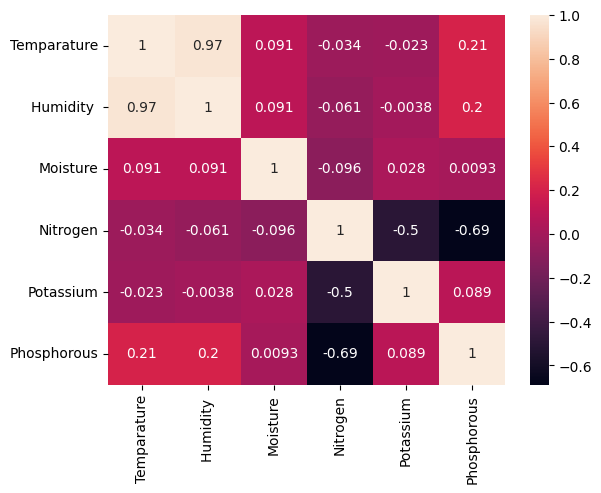

In [98]:
sns.heatmap(df.corr(),annot=True)

In [99]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [100]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 6
Discrete feature Count 4
Continuous feature Count 2
Categorical feature Count 3


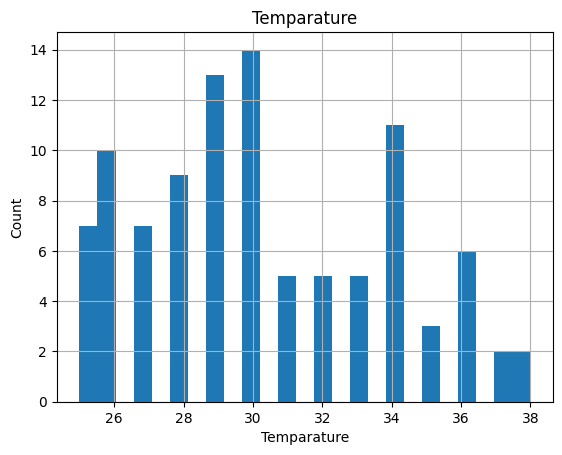

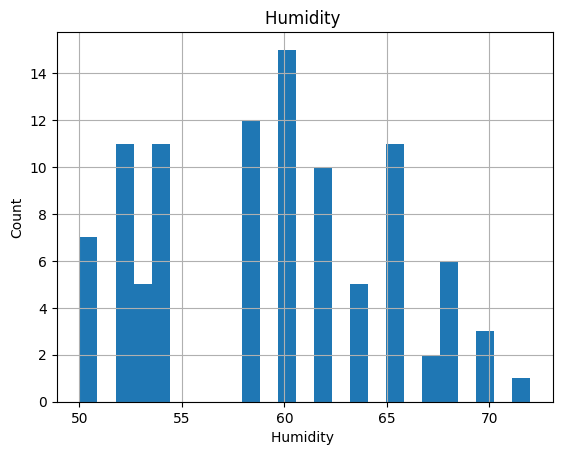

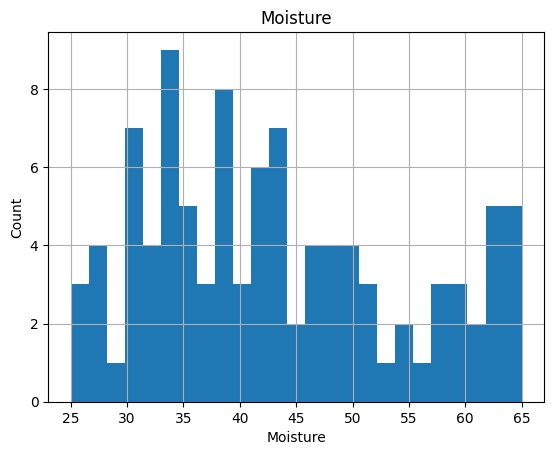

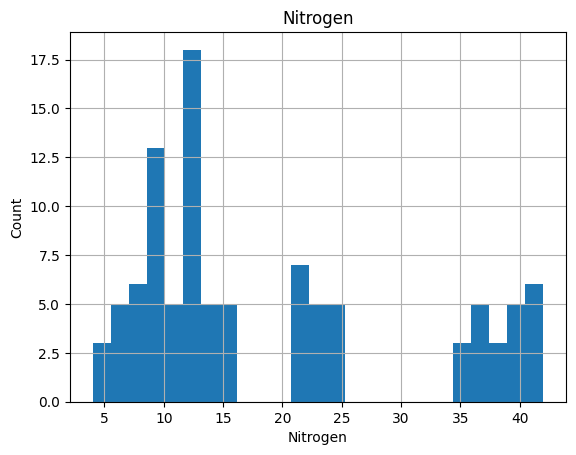

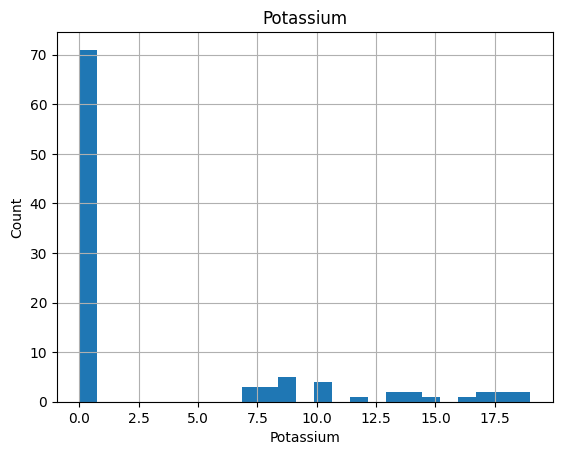

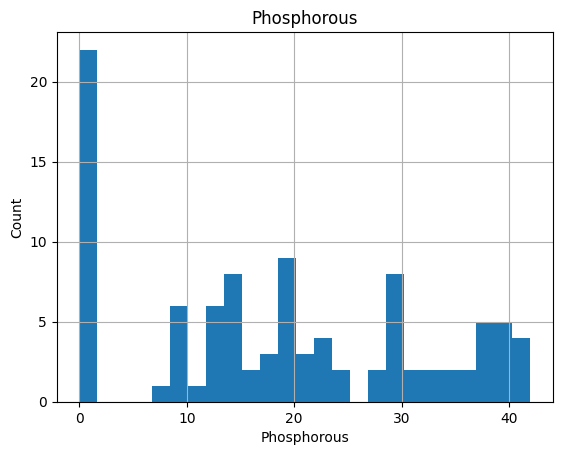

In [101]:
for feature in numerical_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [102]:
discrete_feature

['Temparature', 'Humidity ', 'Nitrogen', 'Potassium']

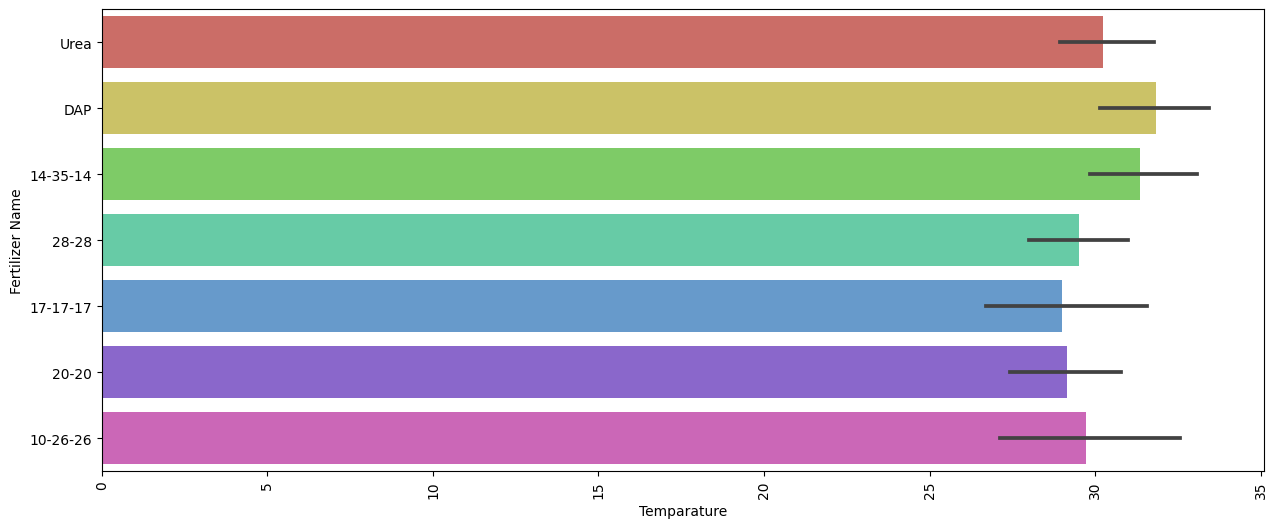

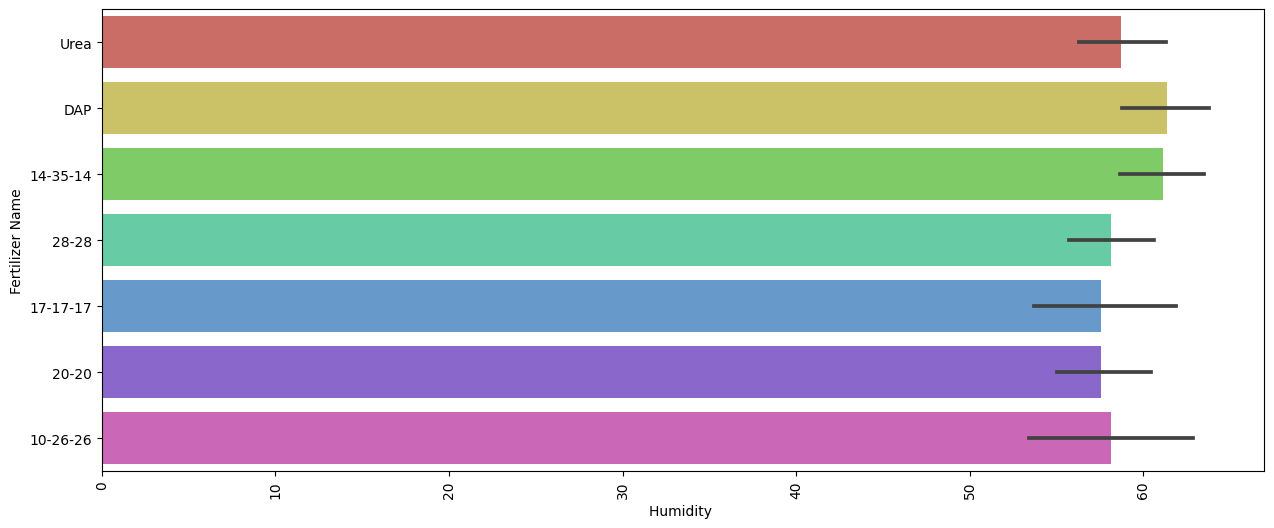

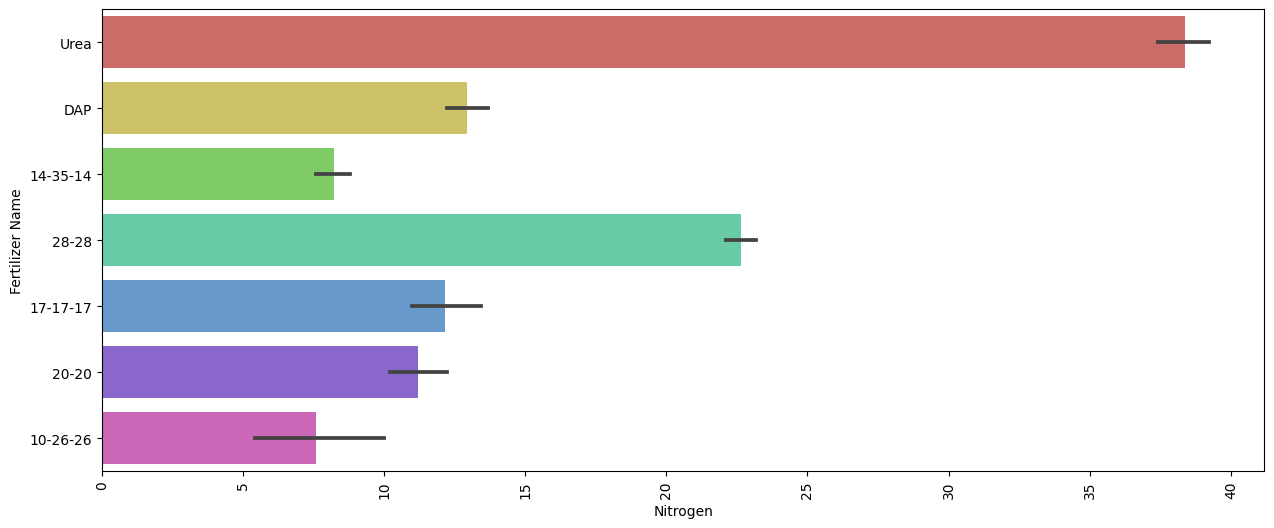

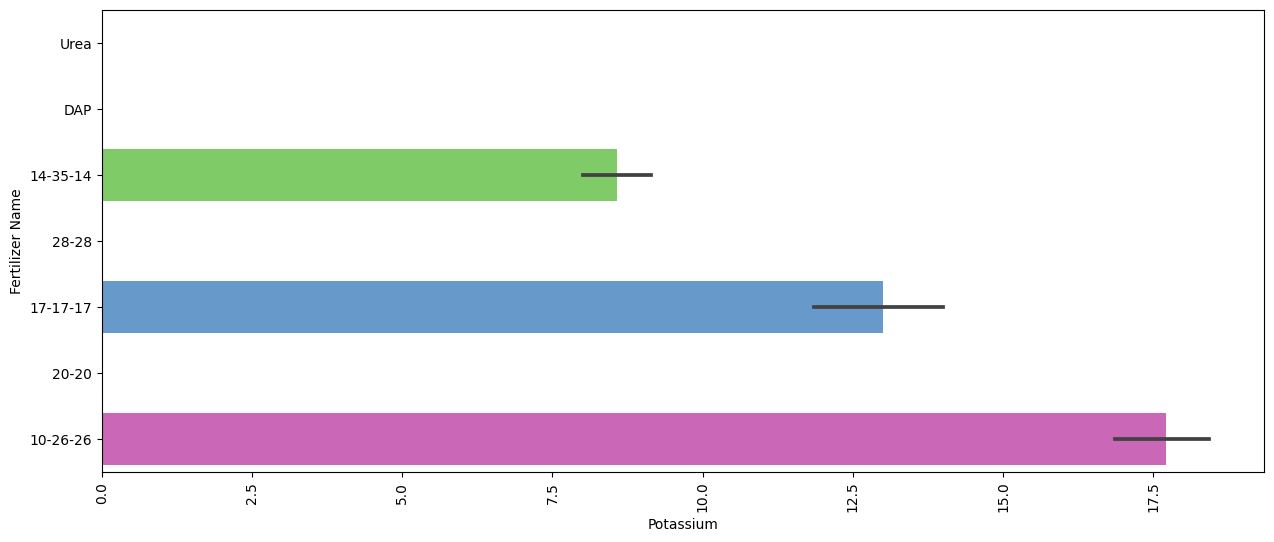

In [103]:

for feature in discrete_feature:
    data=df
    plt.figure(figsize=(15,6))
    sns.barplot(y='Fertilizer Name',x=feature,data=data,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

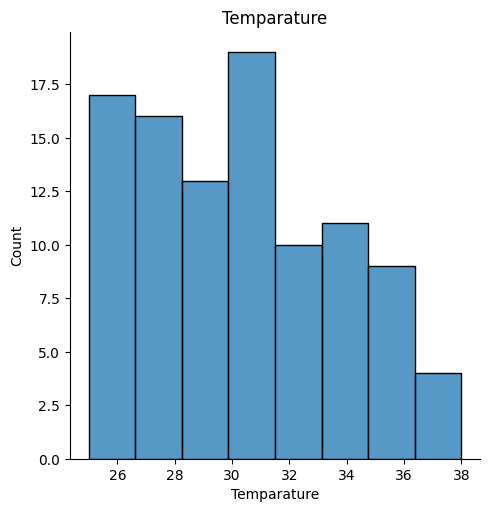

<Figure size 1500x1500 with 0 Axes>

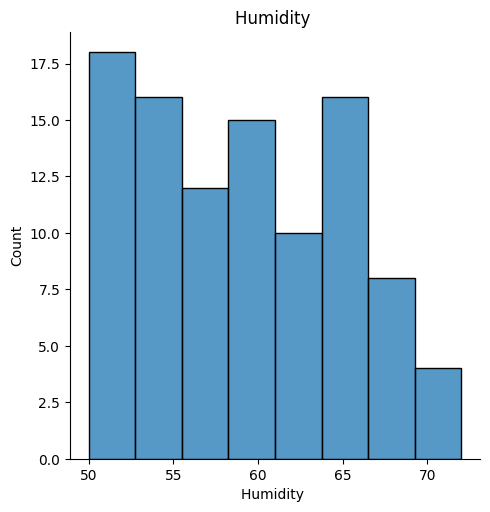

<Figure size 1500x1500 with 0 Axes>

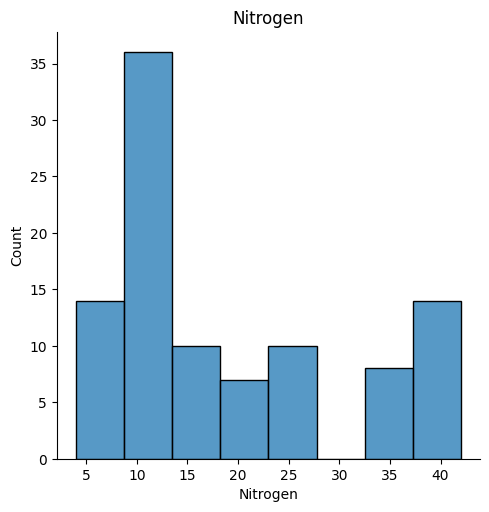

<Figure size 1500x1500 with 0 Axes>

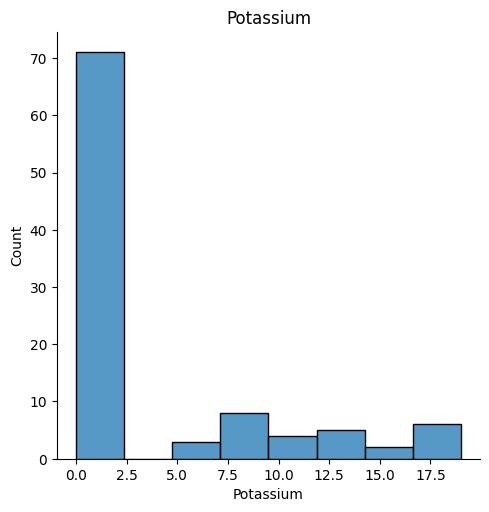

<Figure size 1500x1500 with 0 Axes>

In [104]:
for feature in discrete_feature:
    data=df.copy()
    sns.displot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [105]:
df[discrete_feature].isnull().sum()


Temparature    0
Humidity       0
Nitrogen       0
Potassium      0
dtype: int64

In [106]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.xlabel(feature)
    plt.subplot(1,2,2)
    sns.boxplot(data[feature])

    plt.show()

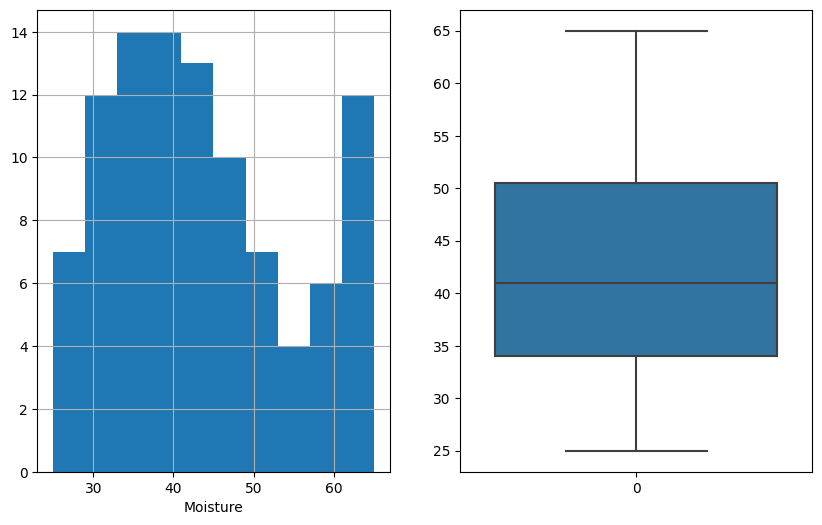

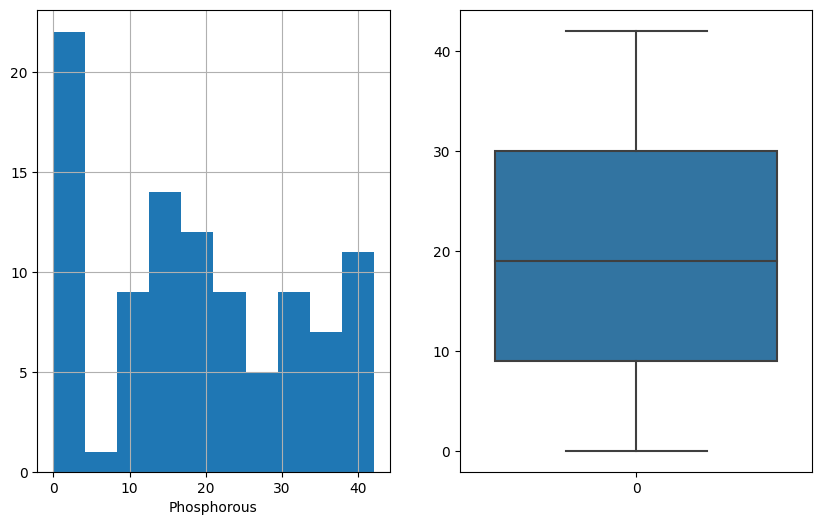

In [107]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    plot_data(data,feature)    
      

In [108]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O' and feature not in ['Fertilizer Name']]
categorical_feature

['Soil Type', 'Crop Type']

In [109]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


encoding categorical feature
ordinal number encoding

In [1]:
df['Soil Type'].unique()

NameError: name 'df' is not defined

In [111]:
#encoding Soil Type variable
data=df.copy()
encode_soil = LabelEncoder()

#fitting the label encoder
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

In [112]:
encode_soil.classes_

array(['Black', 'Clayey', 'Loamy', 'Red', 'Sandy'], dtype=object)

In [113]:
df.head(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,Maize,37,0,0,Urea
1,29,52,45,2,Sugarcane,12,0,36,DAP
2,34,65,62,0,Cotton,7,9,30,14-35-14
3,32,62,34,3,Tobacco,22,0,20,28-28
4,28,54,46,1,Paddy,35,0,0,Urea
5,26,52,35,4,Barley,12,10,13,17-17-17
6,25,50,64,3,Cotton,9,0,10,20-20
7,33,64,50,2,Wheat,41,0,0,Urea
8,30,60,42,4,Millets,21,0,18,28-28
9,29,58,33,0,Oil seeds,9,7,30,14-35-14


label encoding

In [114]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [115]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [116]:
from sklearn.preprocessing import LabelEncoder
data=df.copy()
encode_crop = LabelEncoder()

#fitting the label encoder
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

In [117]:
encode_crop.classes_

array(['Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets', 'Oil seeds',
       'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat'], dtype=object)

In [118]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,28-28
95,30,60,27,3,9,4,17,17,10-26-26
96,38,72,51,2,10,39,0,0,Urea
97,36,60,43,4,4,15,0,41,DAP


In [119]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


Transformation

In [120]:
import scipy.stats as stat
import pylab 

In [121]:
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.xlabel(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

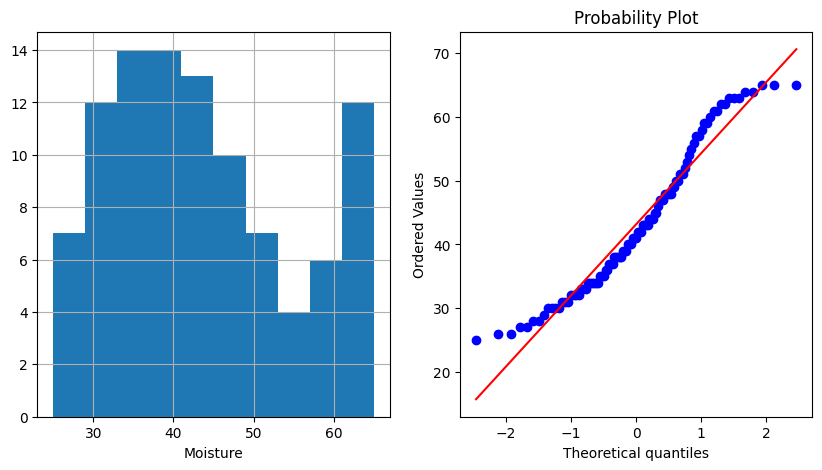

In [122]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plot_data(data,feature)

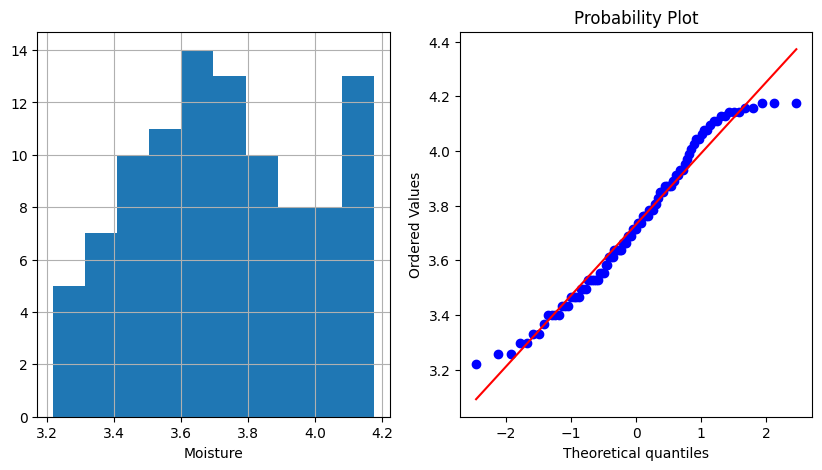

In [123]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plot_data(data,feature)

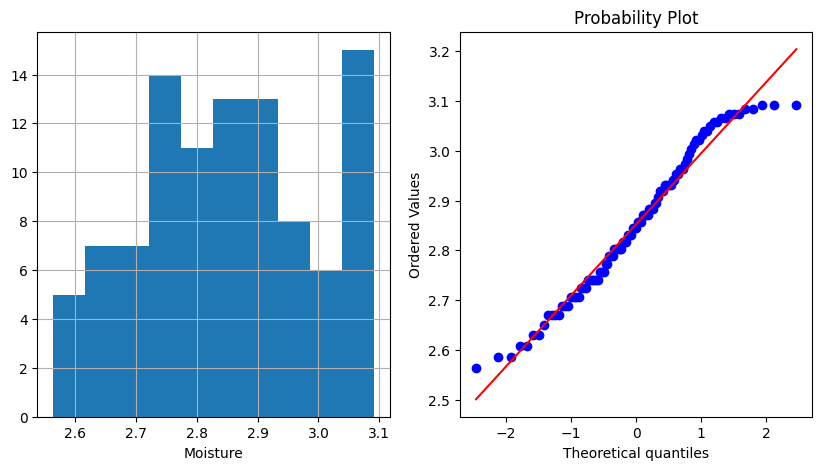

In [124]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature],parameter=stat.boxcox(data[feature]+1)
        plot_data(data,feature)

In [125]:
 df['Moisture'],parameter=stat.boxcox(data['Moisture']+1)

In [126]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,2.802653,4,3,37,0,0,Urea
1,29,52,2.895579,2,8,12,0,36,DAP
2,34,65,3.066231,0,1,7,9,30,14-35-14
3,32,62,2.740448,3,9,22,0,20,28-28
4,28,54,2.907513,1,6,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,2.706189,1,7,24,0,19,28-28
95,30,60,2.608872,3,9,4,17,17,10-26-26
96,38,72,2.963087,2,10,39,0,0,Urea
97,36,60,2.870787,4,4,15,0,41,DAP


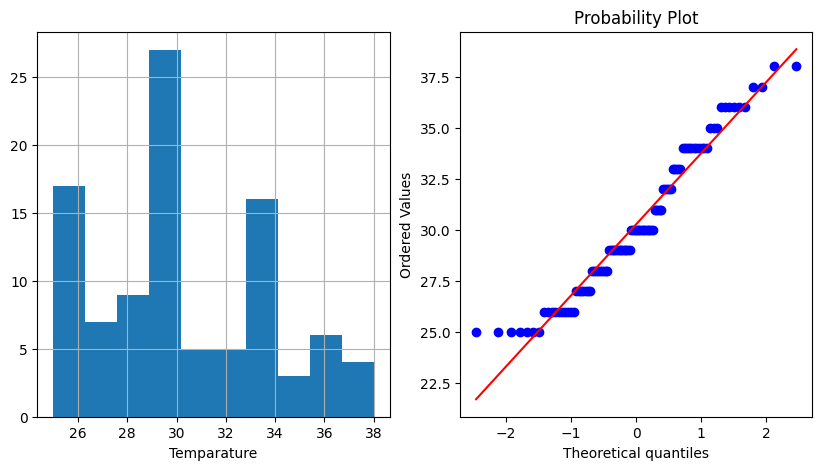

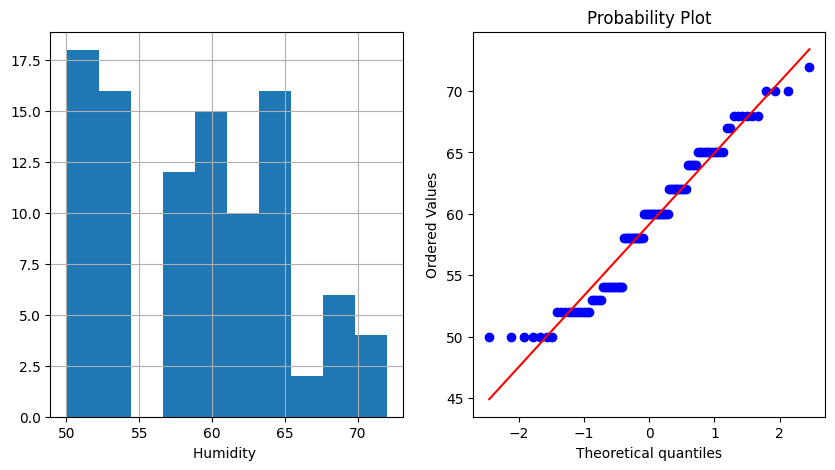

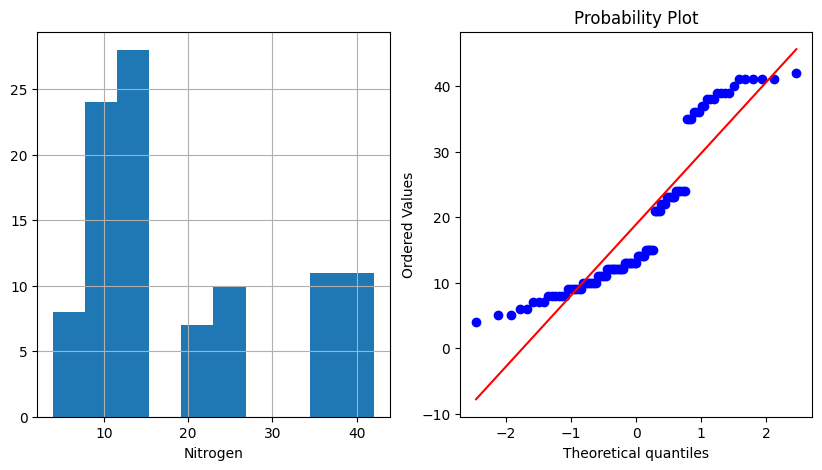

In [127]:
for feature in discrete_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plot_data(data,feature)

log transformation

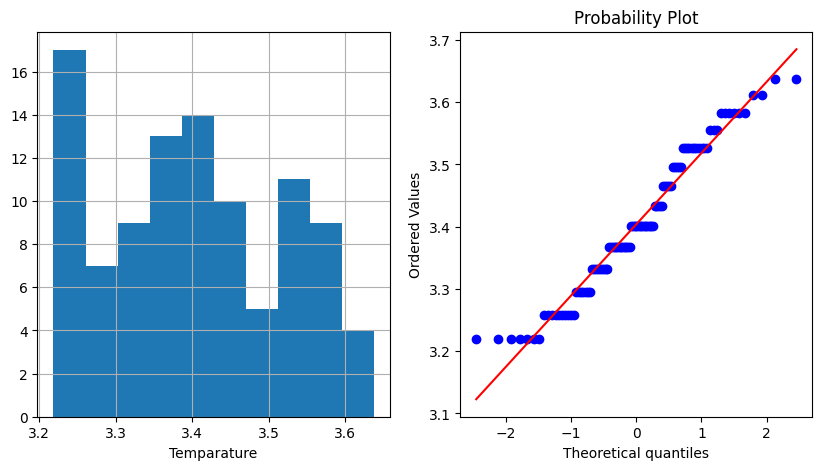

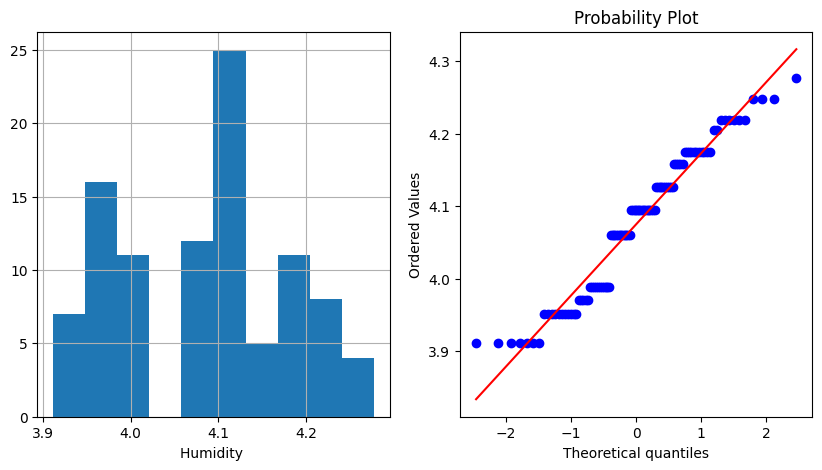

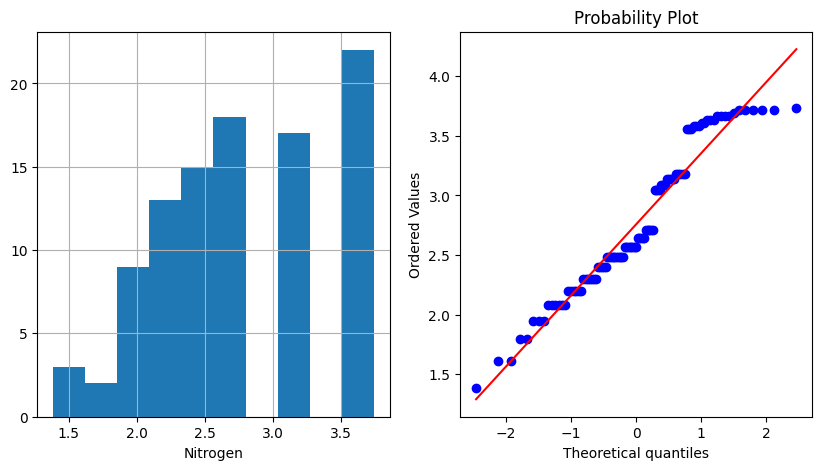

In [128]:
for feature in discrete_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plot_data(data,feature)

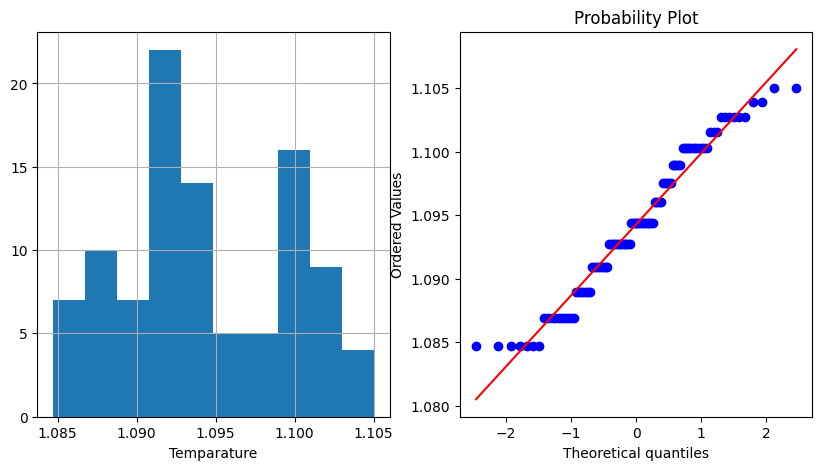

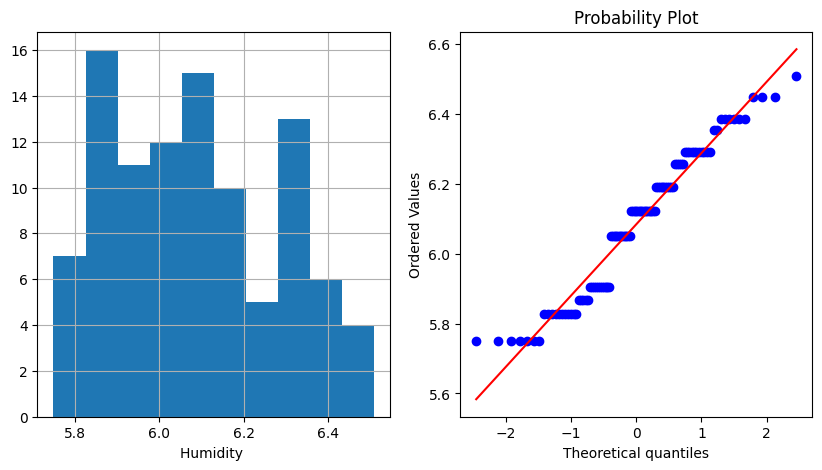

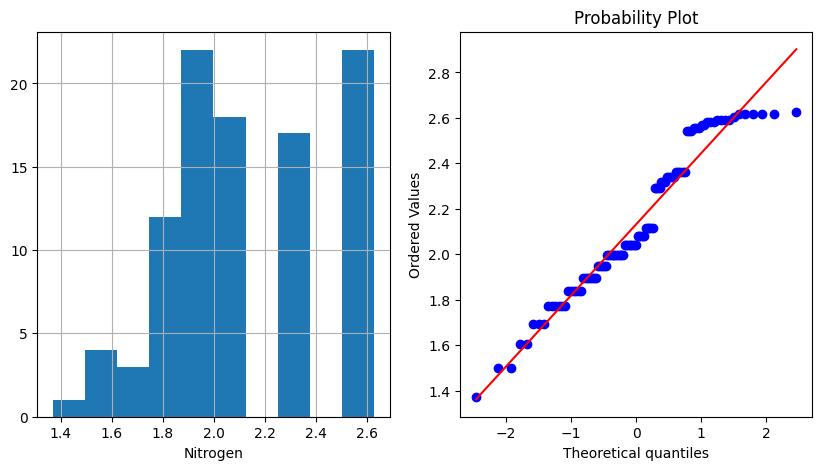

In [129]:
for feature in discrete_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature],parameter=stat.boxcox(data[feature]+1)
        plot_data(data,feature)

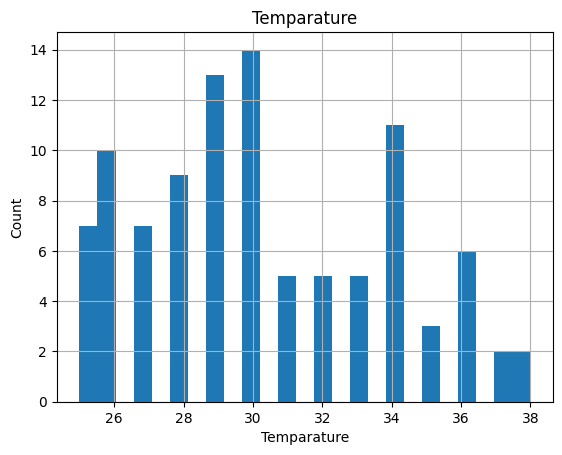

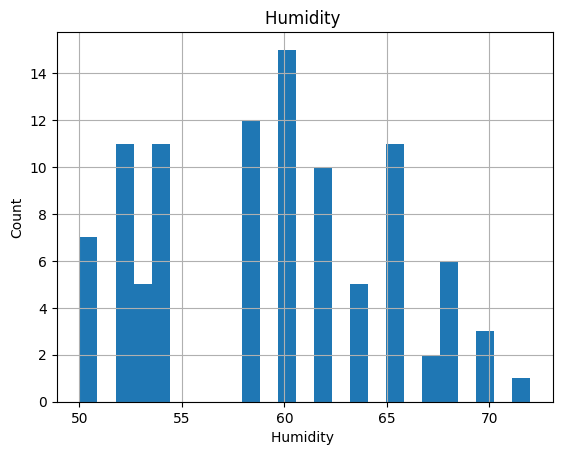

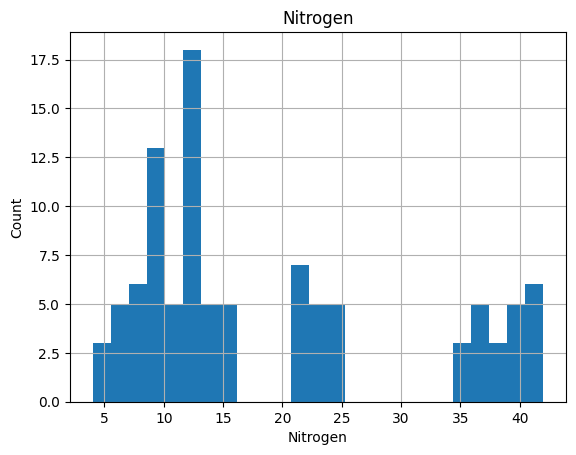

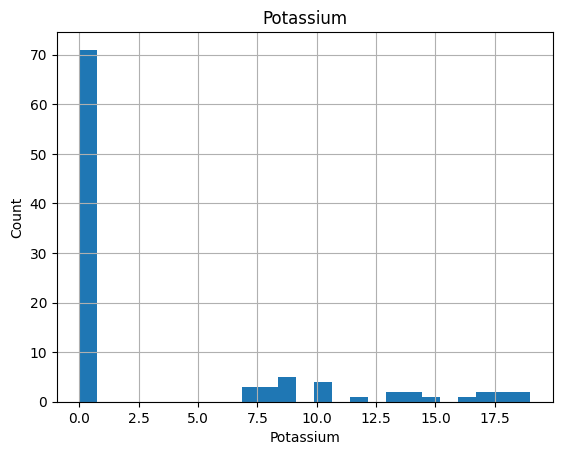

In [130]:
for feature in discrete_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [131]:
df['Nitrogen'],parameter=stat.boxcox(df['Nitrogen']+1)
df['Temparature']=np.log(df['Temparature'])
df['Humidity ']=np.log(df['Humidity '])

In [132]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,3.258097,3.951244,2.802653,4,3,2.568117,0,0,Urea
1,3.367296,3.951244,2.895579,2,8,1.997168,0,36,DAP
2,3.526361,4.174387,3.066231,0,1,1.694709,9,30,14-35-14
3,3.465736,4.127134,2.740448,3,9,2.316360,0,20,28-28
4,3.332205,3.988984,2.907513,1,6,2.542229,0,0,Urea


In [133]:
continuous_feature

['Moisture', 'Phosphorous']

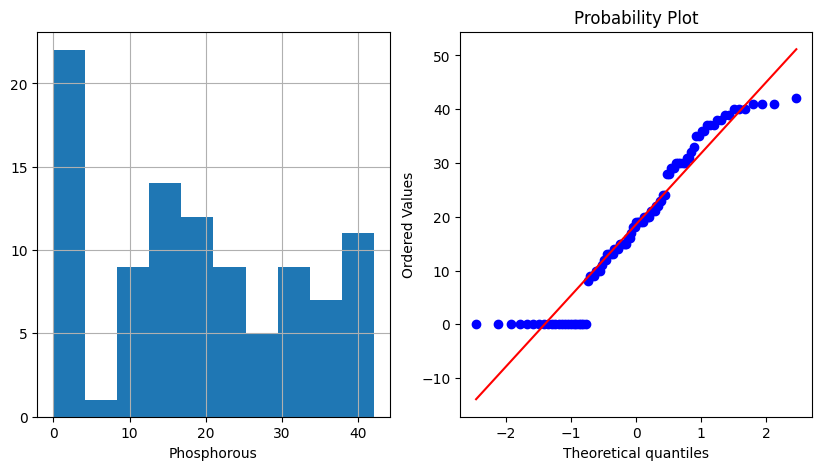

In [134]:

plot_data(df,'Phosphorous')

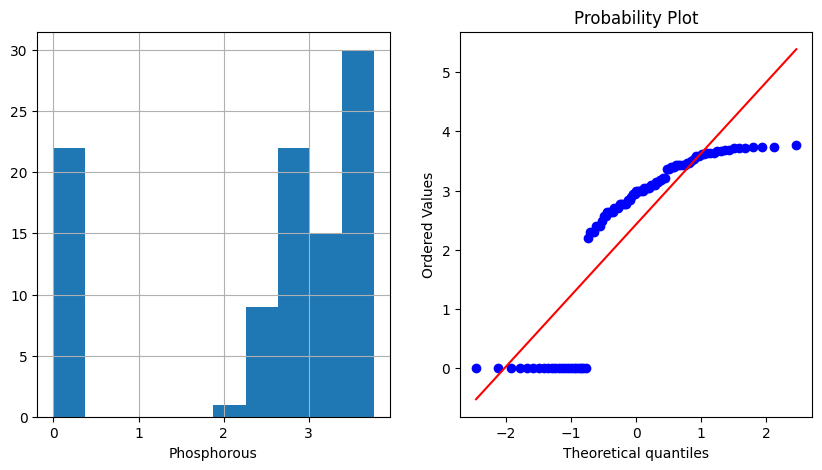

In [135]:
data=df.copy()
data['Phosphorous']=np.log(data['Phosphorous']+1)
plot_data(data,'Phosphorous')

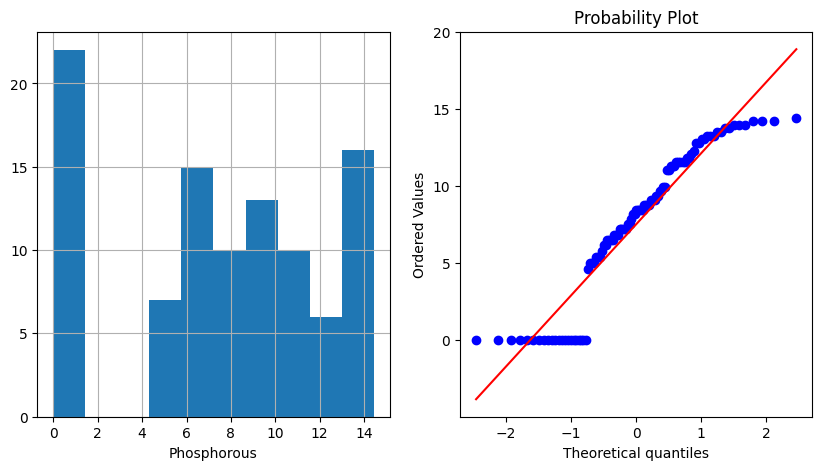

In [136]:
data=df.copy()
data['Phosphorous'],parameter=stat.boxcox(data['Phosphorous']+1)
plot_data(data,'Phosphorous')

In [137]:
df['Phosphorous'],parameter=stat.boxcox(df['Phosphorous']+1)

In [138]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,3.258097,3.951244,2.802653,4,3,2.568117,0,0.000000,Urea
1,3.367296,3.951244,2.895579,2,8,1.997168,0,13.033743,DAP
2,3.526361,4.174387,3.066231,0,1,1.694709,9,11.543044,14-35-14
3,3.465736,4.127134,2.740448,3,9,2.316360,0,8.773216,28-28
4,3.332205,3.988984,2.907513,1,6,2.542229,0,0.000000,Urea


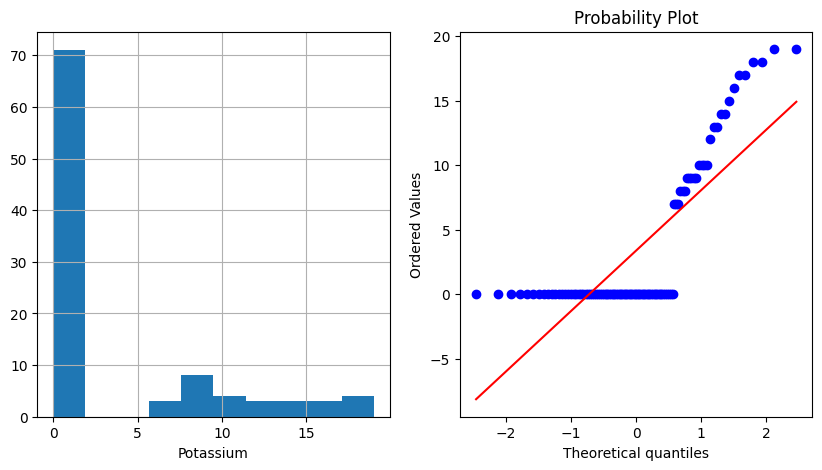

In [139]:

plot_data(df,'Potassium')

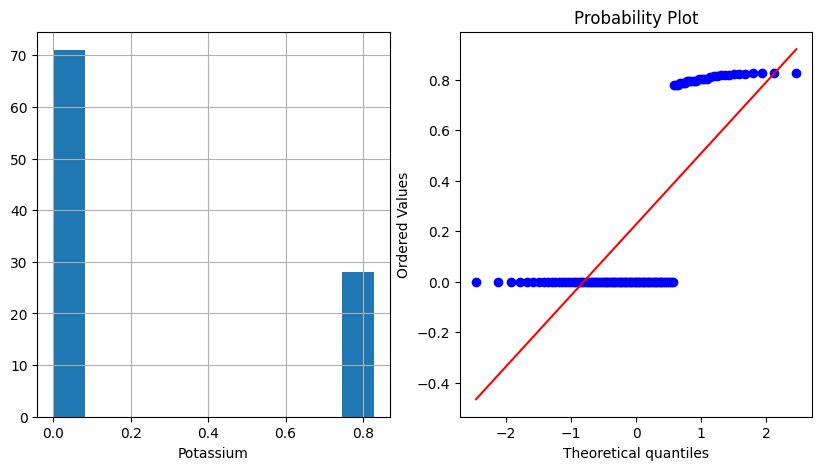

In [140]:
data=df.copy()
data['Potassium'],parameter=stat.boxcox(data['Potassium']+1)
plot_data(data,'Potassium')

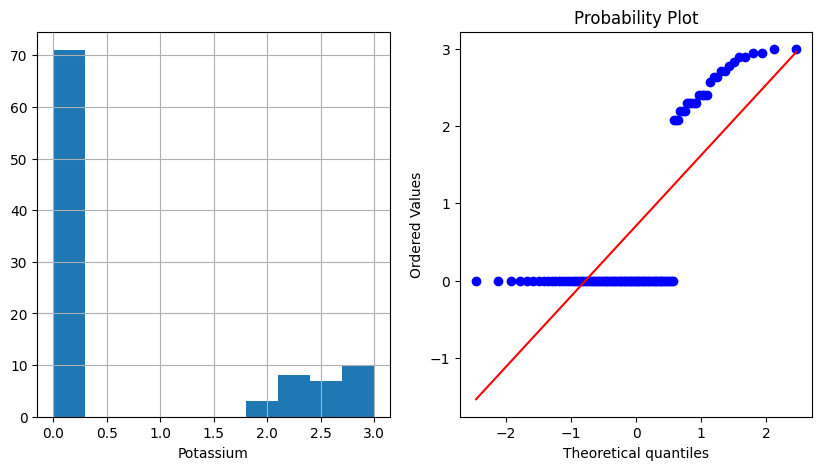

In [141]:
data=df.copy()
data['Potassium']=np.log1p(data['Potassium'])
plot_data(data,'Potassium')

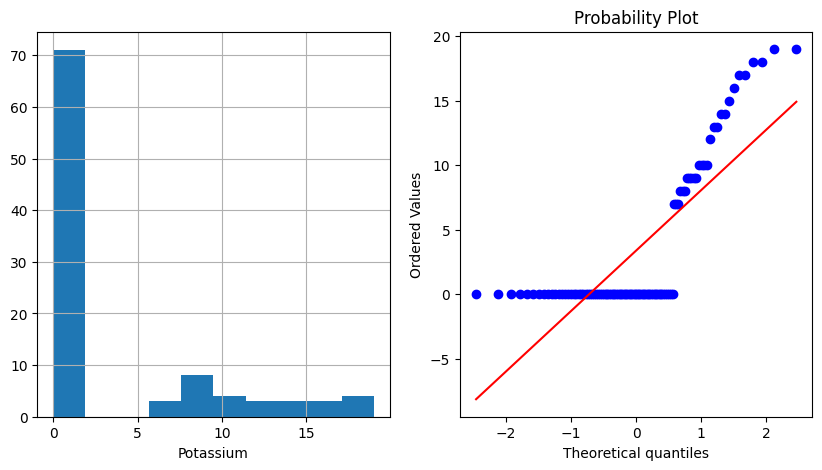

In [142]:
data=df.copy()
data['Potassium']=data.Potassium**(1/1.2)
plot_data(df,'Potassium')

In [143]:
df['Potassium']=df.Potassium**(1/1.2)

In [144]:
df=df.head()

scaling

In [145]:
feature_scale=[feature for feature in df.columns if feature not in ['Fertilizer Name']]


In [146]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,3.258097,3.951244,2.802653,4,3,2.568117,0.000000,0.000000,Urea
1,3.367296,3.951244,2.895579,2,8,1.997168,0.000000,13.033743,DAP
2,3.526361,4.174387,3.066231,0,1,1.694709,6.240251,11.543044,14-35-14
3,3.465736,4.127134,2.740448,3,9,2.316360,0.000000,8.773216,28-28
4,3.332205,3.988984,2.907513,1,6,2.542229,0.000000,0.000000,Urea


In [147]:
x=df.drop(['Fertilizer Name'],axis=1)

In [148]:
x

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,3.258097,3.951244,2.802653,4,3,2.568117,0.000000,0.000000
1,3.367296,3.951244,2.895579,2,8,1.997168,0.000000,13.033743
2,3.526361,4.174387,3.066231,0,1,1.694709,6.240251,11.543044
3,3.465736,4.127134,2.740448,3,9,2.316360,0.000000,8.773216
4,3.332205,3.988984,2.907513,1,6,2.542229,0.000000,0.000000


In [149]:
y=df['Fertilizer Name']

In [150]:
from sklearn.preprocessing import StandardScaler
min_max=StandardScaler()
min_max=min_max.fit_transform(x)
df_minmax=pd.DataFrame(min_max,columns=x.columns)
df_minmax.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,-1.380801,-0.931201,-0.722125,1.414214,-0.798228,1.029261,-0.5,-1.187875
1,-0.237141,-0.931201,0.118445,0.000000,0.864747,-0.677055,-0.5,1.133332
2,1.428765,1.447504,1.662088,-1.414214,-1.463418,-1.580969,2.0,0.867851
3,0.793835,0.943789,-1.284801,0.707107,1.197342,0.276870,-0.5,0.374566
4,-0.604658,-0.528890,0.226393,-0.707107,0.199557,0.951893,-0.5,-1.187875


In [151]:
data = pd.concat([df[['Fertilizer Name']].reset_index(drop=True),pd.DataFrame(df_minmax, columns=feature_scale)],axis=1)

In [152]:
data

,Fertilizer Name,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,Urea,-1.380801,-0.931201,-0.722125,1.414214,-0.798228,1.029261,-0.5,-1.187875
1,DAP,-0.237141,-0.931201,0.118445,0.000000,0.864747,-0.677055,-0.5,1.133332
2,14-35-14,1.428765,1.447504,1.662088,-1.414214,-1.463418,-1.580969,2.0,0.867851
3,28-28,0.793835,0.943789,-1.284801,0.707107,1.197342,0.276870,-0.5,0.374566
4,Urea,-0.604658,-0.528890,0.226393,-0.707107,0.199557,0.951893,-0.5,-1.187875


In [153]:
data.to_csv('fertiliser_preprocessed.csv',index=False)


In [154]:
d1=pd.read_csv('../data/fertiliser_preprocessed.csv')

In [155]:
d1

,Fertilizer Name,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,Urea,0.093670,0.107559,0.452865,1.00,0.3,0.953658,0.000000,0.000000
1,DAP,0.354469,0.107559,0.629324,0.50,0.8,0.498463,0.000000,0.903148
2,14-35-14,0.734361,0.719510,0.953379,0.00,0.1,0.257324,0.536505,0.799853
3,28-28,0.589572,0.589923,0.334743,0.75,0.9,0.752942,0.000000,0.607923
4,Urea,0.270661,0.211059,0.651986,0.25,0.6,0.933018,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
94,28-28,0.000000,0.000000,0.269687,0.25,0.7,0.787714,0.000000,0.586912
95,10-26-26,0.435436,0.500000,0.084889,0.75,0.9,0.000000,0.911478,0.543600
96,Urea,1.000000,1.000000,0.757517,0.50,1.0,0.973029,0.000000,0.000000
97,DAP,0.870872,0.500000,0.582247,1.00,0.4,0.594521,0.000000,0.984248


splitting dataset into train and test

In [156]:
fertnew=d1

In [157]:
fertnew

,Fertilizer Name,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,Urea,0.093670,0.107559,0.452865,1.00,0.3,0.953658,0.000000,0.000000
1,DAP,0.354469,0.107559,0.629324,0.50,0.8,0.498463,0.000000,0.903148
2,14-35-14,0.734361,0.719510,0.953379,0.00,0.1,0.257324,0.536505,0.799853
3,28-28,0.589572,0.589923,0.334743,0.75,0.9,0.752942,0.000000,0.607923
4,Urea,0.270661,0.211059,0.651986,0.25,0.6,0.933018,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
94,28-28,0.000000,0.000000,0.269687,0.25,0.7,0.787714,0.000000,0.586912
95,10-26-26,0.435436,0.500000,0.084889,0.75,0.9,0.000000,0.911478,0.543600
96,Urea,1.000000,1.000000,0.757517,0.50,1.0,0.973029,0.000000,0.000000
97,DAP,0.870872,0.500000,0.582247,1.00,0.4,0.594521,0.000000,0.984248


In [158]:
y=fertnew['Fertilizer Name']
x=fertnew.drop(['Fertilizer Name'],axis=1)

In [159]:
x

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,0.093670,0.107559,0.452865,1.00,0.3,0.953658,0.000000,0.000000
1,0.354469,0.107559,0.629324,0.50,0.8,0.498463,0.000000,0.903148
2,0.734361,0.719510,0.953379,0.00,0.1,0.257324,0.536505,0.799853
3,0.589572,0.589923,0.334743,0.75,0.9,0.752942,0.000000,0.607923
4,0.270661,0.211059,0.651986,0.25,0.6,0.933018,0.000000,0.000000
...,...,...,...,...,...,...,...,...
94,0.000000,0.000000,0.269687,0.25,0.7,0.787714,0.000000,0.586912
95,0.435436,0.500000,0.084889,0.75,0.9,0.000000,0.911478,0.543600
96,1.000000,1.000000,0.757517,0.50,1.0,0.973029,0.000000,0.000000
97,0.870872,0.500000,0.582247,1.00,0.4,0.594521,0.000000,0.984248


In [160]:
y

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object

In [161]:
acc=[]
modelname=[]

In [162]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size = 0.25,random_state =10)

Logistic Regression

In [163]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
lg=LogisticRegression(multi_class='multinomial', solver='lbfgs',random_state=0)
lg.fit(Xtrain,Ytrain)

LogisticRegression(multi_class='multinomial', random_state=0)

In [164]:
predicted_values1=lg.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values1))
print(accuracy_score(Ytest,predicted_values1))
print(classification_report(Ytest,predicted_values1))

x=accuracy_score(Ytest,predicted_values1)
acc.append(x)
modelname.append('Logistic Regression')


[[1 2 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 3 5 0]
 [0 0 0 0 0 0 2]]
0.76
              precision    recall  f1-score   support

    10-26-26       0.50      0.33      0.40         3
    14-35-14       0.67      1.00      0.80         4
    17-17-17       0.00      0.00      0.00         1
       20-20       1.00      1.00      1.00         2
       28-28       0.62      1.00      0.77         5
         DAP       1.00      0.62      0.77         8
        Urea       1.00      1.00      1.00         2

    accuracy                           0.76        25
   macro avg       0.68      0.71      0.68        25
weighted avg       0.77      0.76      0.74        25



/config/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/config/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/config/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
lg.score(Xtrain,Ytrain)

0.9324324324324325

In [166]:
lg.score(Xtest,Ytest)

0.76

saved training LogisticRegression model

In [168]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/FLogisiticRegression.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(lg, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

DecisionTreeClassifier

In [169]:
dt=DecisionTreeClassifier()
dt.fit(Xtrain,Ytrain)

predicted_values2=dt.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values2))
print(accuracy_score(Ytest,predicted_values2))
print(classification_report(Ytest,predicted_values2))

x=accuracy_score(Ytest,predicted_values2)
acc.append(x)
modelname.append('Decision Tree')


[[2 1 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 2]]
0.96
              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       0.80      1.00      0.89         4
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         2
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00         2

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.97      0.96      0.96        25



In [170]:
dt.score(Xtrain,Ytrain)

1.0

In [171]:
dt.score(Xtest,Ytest)

0.96

In [172]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt,x,y,cv=5)
score

TypeError: Singleton array 0.96 cannot be considered a valid collection.

saved training DecisionTreeClassifier model

In [173]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/FDecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(dt, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

RandomForestClassifier

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(Xtrain,Ytrain)

predicted_values3 = rf.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values3))
print(accuracy_score(Ytest,predicted_values3))
print(classification_report(Ytest,predicted_values3))

x=accuracy_score(Ytest,predicted_values3)
acc.append(x)
modelname.append('RandomForestClassifier')

[[1 1 1 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 2]]
0.92
              precision    recall  f1-score   support

    10-26-26       1.00      0.33      0.50         3
    14-35-14       0.80      1.00      0.89         4
    17-17-17       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         2
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00         2

    accuracy                           0.92        25
   macro avg       0.90      0.90      0.87        25
weighted avg       0.95      0.92      0.91        25



In [178]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf,x,y,cv=5)
score

TypeError: Singleton array 0.96 cannot be considered a valid collection.

In [179]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/FRandomForestClassifier.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(rf, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

Gaussian Naive Bais

In [180]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain,Ytrain)


predicted_values4 = nb.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values4))
print(accuracy_score(Ytest,predicted_values4))
print(classification_report(Ytest,predicted_values4))

x=accuracy_score(Ytest,predicted_values4)
acc.append(x)
modelname.append('Guassian Naive Bayes')

[[2 0 1 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 2]]
0.96
              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         2
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00         2

    accuracy                           0.96        25
   macro avg       0.93      0.95      0.92        25
weighted avg       0.98      0.96      0.96        25



In [181]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/FGuassian Naive Bais.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(nb, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

XGBoost

In [182]:
fertnew


,Fertilizer Name,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,Urea,0.093670,0.107559,0.452865,1.00,0.3,0.953658,0.000000,0.000000
1,DAP,0.354469,0.107559,0.629324,0.50,0.8,0.498463,0.000000,0.903148
2,14-35-14,0.734361,0.719510,0.953379,0.00,0.1,0.257324,0.536505,0.799853
3,28-28,0.589572,0.589923,0.334743,0.75,0.9,0.752942,0.000000,0.607923
4,Urea,0.270661,0.211059,0.651986,0.25,0.6,0.933018,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
94,28-28,0.000000,0.000000,0.269687,0.25,0.7,0.787714,0.000000,0.586912
95,10-26-26,0.435436,0.500000,0.084889,0.75,0.9,0.000000,0.911478,0.543600
96,Urea,1.000000,1.000000,0.757517,0.50,1.0,0.973029,0.000000,0.000000
97,DAP,0.870872,0.500000,0.582247,1.00,0.4,0.594521,0.000000,0.984248


In [183]:
fertnew.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [184]:
fertnew['Humidity']

0     0.107559
1     0.107559
2     0.719510
3     0.589923
4     0.211059
        ...   
94    0.000000
95    0.500000
96    1.000000
97    0.500000
98    0.407028
Name: Humidity, Length: 99, dtype: float64

In [185]:
features = fertnew[['Temparature','Humidity','Moisture','Soil_Type','Crop_Type','Nitrogen','Potassium','Phosphorous']]
target = fertnew['Fertilizer']
#features = cropnew[['temperature', 'humidity', 'ph', 'rainfall']]


In [186]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(target)
label_encoded_y = label_encoder.transform(target)

In [187]:
label_encoder.classes_

array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'Urea'], dtype=object)

In [188]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,label_encoded_y,test_size = 0.2,random_state =2)

In [189]:
from xgboost import XGBClassifier  
import xgboost

In [190]:
xgb = XGBClassifier()
xgb.fit(Xtrain, Ytrain)

predicted_values6 = xgb.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values6))
print(accuracy_score(Ytest,predicted_values6))
print(classification_report(Ytest,predicted_values6))


x=accuracy_score(Ytest,predicted_values6)
acc.append(x)
modelname.append('XGboost')

[[3 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [191]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
filename = '../models/FXGBoost.pkl'
# Open the file to save as pkl file

pickle.dump(xgb, open(filename, "wb"))
xgb_model_loaded = pickle.load(open(filename, "rb"))
# Close the pickle instances
DT_Model_pkl.close()


Support vector machine

In [192]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(Xtrain,Ytrain)

predicted_values5 = SVM.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values5))
print(accuracy_score(Ytest,predicted_values5))
print(classification_report(Ytest,predicted_values5))



[[1 2 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]
0.8
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.25      0.50      0.33         2
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5

    accuracy                           0.80        20
   macro avg       0.75      0.69      0.69        20
weighted avg       0.88      0.80      0.81        20



In [193]:
SVM.score(Xtrain,Ytrain)

0.9493670886075949

In [194]:
SVM.score(Xtest,Ytest)

0.8

In [195]:
param ={"kernel":['linear', 'poly', 'rbf', 'sigmoid' ],
        'C':[.1,.4 , .6 , 1,2,3,100,200,500],
        'gamma':[.001,.1,.4,.004,.003]
    } 
svm_grid = GridSearchCV(SVM , param_grid=param , verbose=3 )
svm_grid.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.438 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.438 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.375 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.500 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.400 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.438 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.375 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.188 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.188 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.200 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.438 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rb

/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.438 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.375 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.500 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.400 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.438 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.375 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.188 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.188 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.200 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.438 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.438 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.188 total time=   0.0s
[CV 4/5] END ......C=0.1, ga

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.6, 1, 2, 3, 100, 200, 500],
                         'gamma': [0.001, 0.1, 0.4, 0.004, 0.003],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [196]:
svm_grid.best_params_

{'C': 500, 'gamma': 0.1, 'kernel': 'poly'}

In [197]:
svc1 = SVC(C= 500, gamma= 0.1, kernel= 'poly')
svc1.fit(Xtrain,Ytrain)

pred5=svc1.predict(Xtest)
print(confusion_matrix(Ytest,pred5))
print(accuracy_score(Ytest,pred5))
print(classification_report(Ytest,pred5))

x=accuracy_score(Ytest,pred5)
acc.append(x)
modelname.append('support Vector Machine')

[[3 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [198]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/FSupport Vector.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(svc1, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [199]:
acc

[0.76, 0.96, 0.92, 0.96, 0.96, 1.0, 1.0]

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

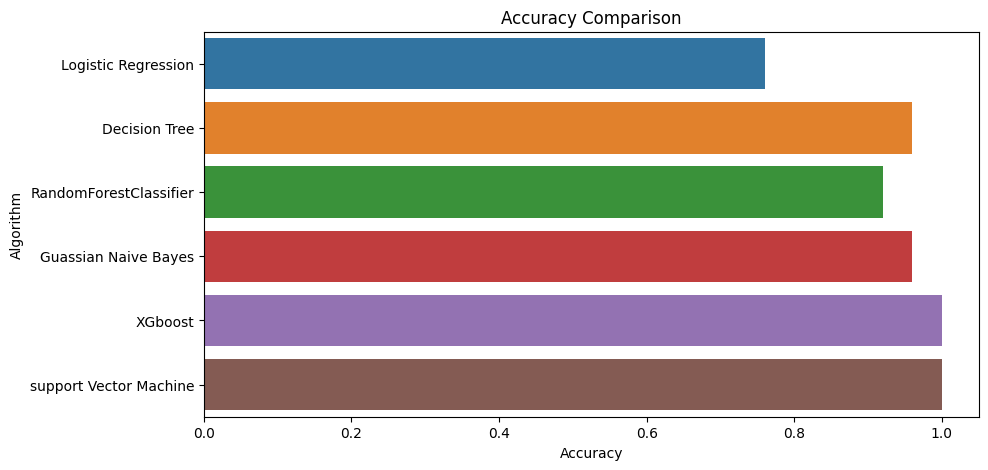

In [200]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = modelname)

In [201]:
accuracy_models = dict(zip(modelname, acc))
for k, v in accuracy_models.items():
    print (k, ':', v)

Logistic Regression : 0.76
Decision Tree : 0.96
RandomForestClassifier : 0.92
Guassian Naive Bayes : 0.96
XGboost : 1.0
support Vector Machine : 1.0


In [202]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,3.258097,3.951244,2.802653,4,3,2.568117,0.000000,0.000000,Urea
1,3.367296,3.951244,2.895579,2,8,1.997168,0.000000,13.033743,DAP
2,3.526361,4.174387,3.066231,0,1,1.694709,6.240251,11.543044,14-35-14
3,3.465736,4.127134,2.740448,3,9,2.316360,0.000000,8.773216,28-28
4,3.332205,3.988984,2.907513,1,6,2.542229,0.000000,0.000000,Urea


In [203]:
soil_type=['Black', 'Clayey', 'Loamy', 'Red', 'Sandy']
crop_type=['Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets', 'Oil seeds','Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat']


In [205]:
data = np.array([[32	,62,	34,	soil_type.index('Sandy'),crop_type.index('Millets')	,	22,	0,	20]])
prediction = xgb.predict(data)
print(prediction)

[6]
